<a href="https://colab.research.google.com/github/Sahil-Chhabra-09/Computer-Vision/blob/main/Smile_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import keras.layers as tfl

### Loading dataset

In [2]:
import numpy as np
import h5py

def load_happy_dataset():
    train_dataset = h5py.File('/content/drive/MyDrive/Happy Dataset/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/drive/MyDrive/Happy Dataset/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

In [6]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [7]:
import matplotlib.pyplot as plt

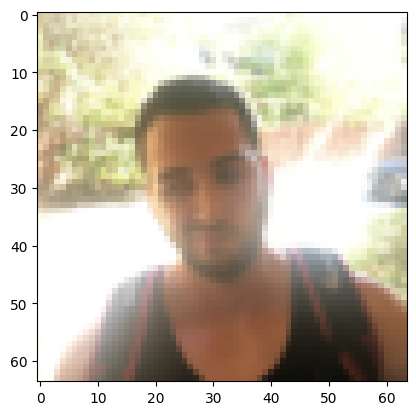

In [12]:
index = 89
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

### Creating a Sequential Model

In [14]:
def happyModel():

  model = tf.keras.Sequential([
      ## padding with pad = 3
      tfl.ZeroPadding2D(padding = (3, 3), input_shape = (64, 64, 3)),
      ## convolution layer with 32 7 * 7 filters and stride of 1
      tfl.Conv2D(filters = 32, kernel_size = (7, 7), strides = 1),
      ## Batch Normalization for axis = 3
      tfl.BatchNormalization(axis = 3),
      ## Relu layer
      tfl.ReLU(),
      ## max pooling with default parameters of filter = 2 * 2 and stride = 2
      tfl.MaxPooling2D(),
      ## flatten layer
      tfl.Flatten(),
      ## dense layer with 1 neuron for output and sigmoid activation
      tfl.Dense(1, activation = 'sigmoid')
  ])
  return model

In [29]:
happy_model = happyModel()

In [30]:
happy_model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [21]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

### Training and Evaluating Model

In [31]:
happy_model.fit(X_train, Y_train, epochs = 10, batch_size = 32)

Epoch 1/10
19/19 [==============================] - 7s 248ms/step - loss: 1.5457 - accuracy: 0.6533
Epoch 2/10
19/19 [==============================] - 4s 227ms/step - loss: 0.2766 - accuracy: 0.8750
Epoch 3/10
19/19 [==============================] - 7s 351ms/step - loss: 0.1800 - accuracy: 0.9467
Epoch 4/10
19/19 [==============================] - 4s 227ms/step - loss: 0.1010 - accuracy: 0.9683
Epoch 5/10
19/19 [==============================] - 4s 225ms/step - loss: 0.1195 - accuracy: 0.9483
Epoch 6/10
19/19 [==============================] - 7s 350ms/step - loss: 0.0805 - accuracy: 0.9717
Epoch 7/10
19/19 [==============================] - 4s 231ms/step - loss: 0.0666 - accuracy: 0.9833
Epoch 8/10
19/19 [==============================] - 4s 229ms/step - loss: 0.0642 - accuracy: 0.9800
Epoch 9/10
19/19 [==============================] - 7s 357ms/step - loss: 0.0499 - accuracy: 0.9867
Epoch 10/10
19/19 [==============================] - 4s 227ms/step - loss: 0.0472 - accuracy: 0.9833

In [32]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 1s 101ms/step - loss: 0.3138 - accuracy: 0.8867


[0.3138211965560913, 0.8866666555404663]